Examen final de iteligencia artificial 
Aprendisaje no supervidado
Machine learning
Diego Roberto Arancibia Delgado
Repositotio git: 

In [1]:
#importando librerias necesarias
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import optimize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
# from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [5]:
data = pd.read_csv('dataset_0.csv', delimiter=",")

data

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      166  218  221  166  218  221  166  218  221  166  218  221  166  218   
2       86  185  103   86  185  103   86  185  103   86  185  103  255  255   
3      246  142  226  246  142  226  246  142  226  246  142  226  246  142   
4      144    1  194  144    1  194  144    1  194  144    1  194  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  211   14   11  255  255  255  211   14   11  255  255  255  255  255   
49996  190  236  164  190  236  164  190  236  164  190  236  164  190  236   
49997  218  215  249  218  215  249  255  255  255  255  255  255  255  255   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      221  166  218  221  166  218  221  166  218  221  166  218  221  166   
2      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
3      226  246  142  226  246  142  226  246  142  226  246  142  226  246   
4      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49996  164  190  236  164  190  236  164  190  236  164  190  236  164  190   
49997  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      218  221  166  218  221  166  218  221  166  218  221  166  218  221   
2      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
3      142  226  246  142  226  246  142  226  246  142  226  246  142  226   
4      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49996  236  164  190  236  164  190  236  164  190  236  164  190  236  164   
49997  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      166  218  221  166  218  221  166  218  221  166  218  221  166  218   
2      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
3      246  142  226  255  255  255  255  255  255  255  255  255  255  255   
4      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49996  190  236  164  190  236  164  190  236  164  190  236  164  190  236   
49997  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        56   57   58   59   60   61   62   63   64   65   66   67   68   69  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      221  166  218  221  166  218  221  166  218  221

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))

In [7]:
data

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      166  218  221  166  218  221  166  218  221  166  218  221  166  218   
2       86  185  103   86  185  103   86  185  103   86  185  103  255  255   
3      246  142  226  246  142  226  246  142  226  246  142  226  246  142   
4      144    1  194  144    1  194  144    1  194  144    1  194  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  211   14   11  255  255  255  211   14   11  255  255  255  255  255   
49996  190  236  164  190  236  164  190  236  164  190  236  164  190  236   
49997  218  215  249  218  215  249  255  255  255  255  255  255  255  255   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      221  166  218  221  166  218  221  166  218  221  166  218  221  166   
2      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
3      226  246  142  226  246  142  226  246  142  226  246  142  226  246   
4      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49996  164  190  236  164  190  236  164  190  236  164  190  236  164  190   
49997  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      218  221  166  218  221  166  218  221  166  218  221  166  218  221   
2      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
3      142  226  246  142  226  246  142  226  246  142  226  246  142  226   
4      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49996  236  164  190  236  164  190  236  164  190  236  164  190  236  164   
49997  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      166  218  221  166  218  221  166  218  221  166  218  221  166  218   
2      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
3      246  142  226  255  255  255  255  255  255  255  255  255  255  255   
4      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49996  190  236  164  190  236  164  190  236  164  190  236  164  190  236   
49997  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        56   57   58   59   60   61   62   63   64   65   66   67   68   69  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      221  166  218  221  166  218  221  166  218  221

In [8]:
scaled_data

array([[ 0.92904361,  0.92731367,  0.93054777, ...,  0.04081723,
         0.03973075,  0.04089391],
       [-0.11819805,  0.49083106,  0.53142306, ...,  0.04081723,
         0.03973075,  0.04089391],
       [-1.05953886,  0.10153576, -0.85377449, ...,  0.04081723,
         0.03973075,  0.04089391],
       ...,
       [ 0.49367348,  0.45544058,  0.860114  , ...,  0.04081723,
         0.03973075,  0.04089391],
       [ 0.92904361,  0.92731367,  0.93054777, ...,  0.04081723,
         0.03973075,  0.04089391],
       [ 0.92904361,  0.92731367,  0.93054777, ...,  0.04081723,
         0.03973075,  0.04089391]])

In [9]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)


y_pred = kmeans.fit_predict(scaled_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
y_pred

C:\Users\TERABYTE10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\TERABYTE10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


array([1, 1, 1, ..., 1, 0, 1])

In [10]:
kmeans.cluster_centers_

array([[ 0.9216427 ,  0.91996533,  0.92108819, ..., -0.39302702,
        -0.37557203, -0.39531698],
       [ 0.03996148,  0.03659908,  0.04332331, ...,  0.02712332,
         0.02578342,  0.02731137],
       [-0.6516068 , -0.63276346, -0.66938861, ...,  0.04081723,
         0.03973075,  0.04089391]])

In [12]:
import numpy as np


# Seleccionar muestras del conjunto de datos preprocesado y normalizado
X_samples = scaled_data[np.random.choice(scaled_data.shape[0], 4, replace=False)]

# Imprimir las muestras seleccionadas
print("Muestras seleccionadas:")
print(X_samples)

# Utilizar el modelo KMeans para predecir el cluster de las nuevas muestras
y_pred = kmeans.predict(X_samples)
print("Predicciones de cluster para las nuevas muestras:")
print(y_pred)

Muestras seleccionadas:
[[-1.53020927 -0.05182299  0.36707759 ...  0.04081723  0.03973075
   0.04089391]
 [-1.67141039 -1.84494073 -0.1963926  ...  0.04081723  0.03973075
   0.04089391]
 [-1.76554448 -0.12260395  0.63707372 ...  0.04081723  0.03973075
   0.04089391]
 [ 0.92904361  0.92731367  0.93054777 ...  0.04081723  0.03973075
   0.04089391]]
Predicciones de cluster para las nuevas muestras:
[2 1 1 1]


Utilizaremos el metodo de la silueta para calcular el numero adecuado de cluster

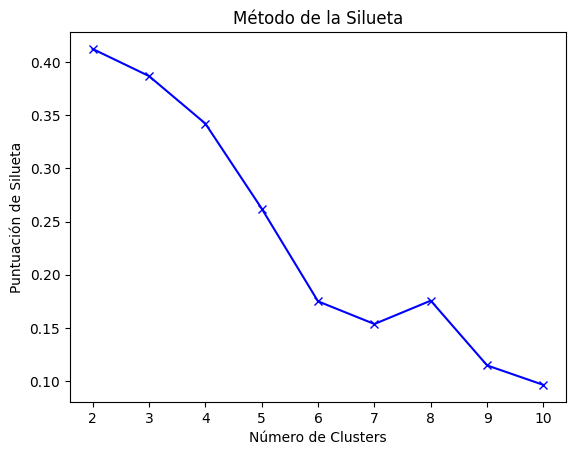

El número óptimo de clusters según la puntuación de silueta es: 2


In [13]:
import numpy as np
none_y = scaled_data[:, :-1]
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)  # Prueba con un rango de 2 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(none_y)
    silhouette_avg = silhouette_score(none_y, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de silueta
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.show()
best_silhouette_index = np.argmax(silhouette_scores)
best_num_clusters = best_silhouette_index + 2  # Sumamos 2 ya que comenzamos desde 2 clusters
print("El número óptimo de clusters según la puntuación de silueta es:", best_num_clusters)


In [ ]:
import os
import cv2
import numpy as np

# Ruta al directorio donde están tus imágenes
ruta_dataset = 'ruta/a/tu/dataset'

# Dimensiones a las que quieres cambiar el tamaño de las imágenes
ancho, alto = 64, 64

# Listas para almacenar las imágenes procesadas y las etiquetas
imagenes = []
etiquetas = []

# Leer las imágenes desde el disco
for carpeta in os.listdir(ruta_dataset):
    ruta_carpeta = os.path.join(ruta_dataset, carpeta)
    if os.path.isdir(ruta_carpeta):
        for archivo in os.listdir(ruta_carpeta):
            ruta_imagen = os.path.join(ruta_carpeta, archivo)
            imagen = cv2.imread(ruta_imagen)
            imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises
            imagen = cv2.resize(imagen, (ancho, alto))  # Cambiar tamaño
            imagen = imagen.flatten()  # Aplanar la imagen si es necesario para tu modelo
            imagenes.append(imagen)
            etiquetas.append(carpeta)  # Asume que el nombre de la carpeta es la etiqueta

# Convertir listas a arrays de NumPy
X = np.array(imagenes)
y = np.array(etiquetas)

# Ahora X e y están listos para ser usados en el entrenamiento del modelo

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np
import cv2  # Para preprocesamiento de imágenes

# Cargar tu conjunto de datos
# Aquí necesitarás cargar tus imágenes y etiquetas. Este es solo un placeholder.
X, y = datasets.load_digits(return_X_y=True)

# Preprocesamiento de datos
# Asegúrate de que todas tus imágenes tengan el mismo tamaño, etc.

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Seleccionar y entrenar el modelo
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = clf.predict(X_test)
print("Precisión:", accuracy_score(y_test, y_pred))

# Predicción con una nueva imagen
# Preprocesa la nueva imagen para que coincida con el formato de entrenamiento
# new_image = cv2.imread('ruta_a_tu_imagen')
# new_image_processed = preprocesar_imagen(new_image)
# prediction = clf.predict([new_image_processed])
# print("La imagen es un/a:", prediction)


Precisión: 0.9877641824249166
